<a href="https://colab.research.google.com/github/UsmanHaziq/CASE--I-Lungs-cancer/blob/main/CNN-TIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs cancer inmol/Train',
    target_size=(224, 224),
    batch_size=32
)

val_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs cancer inmol/Val',
    target_size=(224, 224),
    batch_size=32
)

Found 357 images belonging to 3 classes.
Found 77 images belonging to 3 classes.


In [4]:
test_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs cancer inmol/Test',
    target_size=(224, 224),
    batch_size=32
)


Found 76 images belonging to 3 classes.


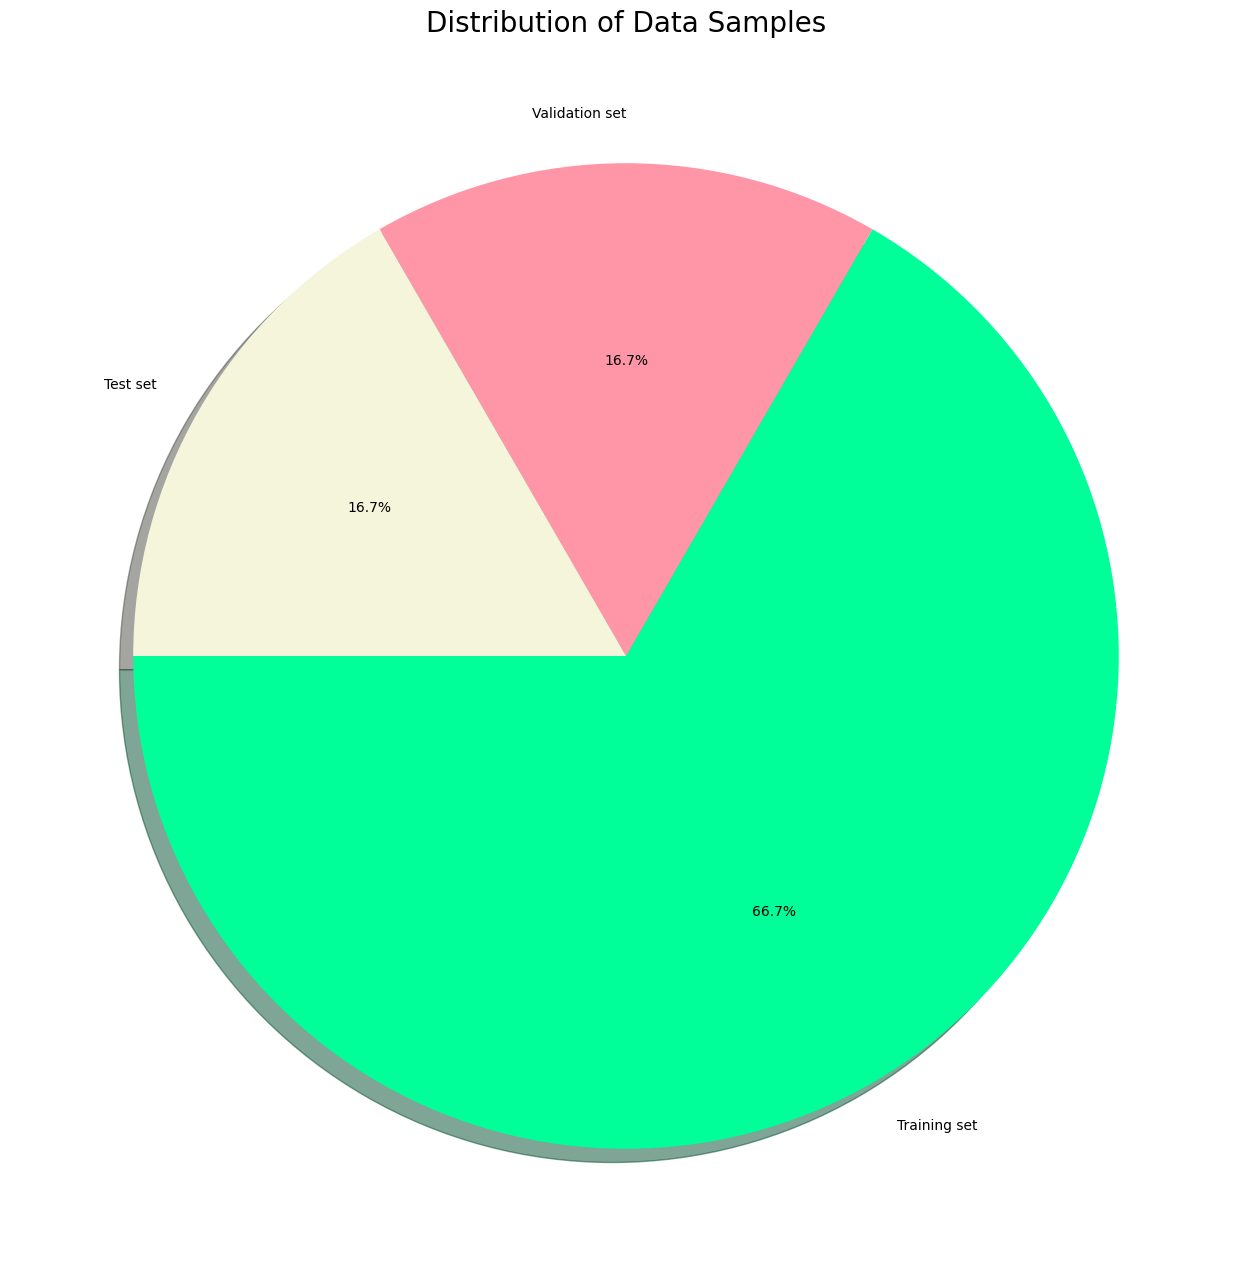

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()



In [6]:

class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [7]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break


(32, 224, 224, 3)


In [8]:
from tensorflow.keras.applications import InceptionV3
IMAGE_SIZE = [224, 224]

In [9]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224, 224, 3),strides=1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

import tensorflow as tf
from tensorflow.keras import losses, optimizers

# Compile the model
model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adadelta(),
                  metrics=['accuracy'])

In [10]:
import time
start_time=time.time()
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=60,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)
end_time=time.time()
elapsed_time=end_time=start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/60
12/12 [==============================] - 130s 11s/step - loss: 1.0635 - accuracy: 0.4510 - val_loss: 1.0141 - val_accuracy: 0.5195
Epoch 2/60
12/12 [==============================] - 120s 10s/step - loss: 0.9839 - accuracy: 0.5826 - val_loss: 0.9016 - val_accuracy: 0.6623
Epoch 3/60
12/12 [==============================] - 111s 9s/step - loss: 0.8895 - accuracy: 0.5770 - val_loss: 0.8363 - val_accuracy: 0.8052
Epoch 4/60
12/12 [==============================] - 113s 9s/step - loss: 0.8166 - accuracy: 0.6611 - val_loss: 0.7567 - val_accuracy: 0.7922
Epoch 5/60
12/12 [==============================] - 110s 9s/step - loss: 0.7823 - accuracy: 0.6359 - val_loss: 0.7099 - val_accuracy: 0.8312
Epoch 6/60
12/12 [==============================] - 111s 9s/step - loss: 0.7192 - accuracy: 0.6639 - val_loss: 0.6719 - val_accuracy: 0.8182
Epoch 7/60
12/12 [==============================] - 121s 10s/step - loss: 0.7094 - accuracy: 0.6807 - val_loss: 0.6433 - val_accuracy: 0.8312
Epoch 8/60